<Figure size 432x288 with 0 Axes>

Text(1.08,22.0,'22.0')

Text(1.0224137931034483,51.0,'51.0')

Text(0.9611111111111111,60.0,'60.0')

Text(1.0490062111801242,865.0,'865.0')

Text(1.0497496322724,4060.3,'4060.3')

Text(0.8867346938775389,4065.2,'4065.2')

Text(1.0496853119345448,6607.4,'6607.4')

Text(1.049679877072796,9106.44,'9106.44')

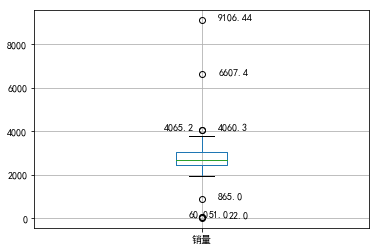

In [1]:
# %load C:\usr\longfengpili\pydata\jupyter\Python数据分析与挖掘实战\chapter3\demo\code\3-1_abnormal_check.py
import pandas as pd

catering_sale = r'C:\usr\longfengpili\pydata\jupyter\Python数据分析与挖掘实战\原书代码数据\chapter3/demo/data/catering_sale.xls' #餐饮数据
data = pd.read_excel(catering_sale, index_col = u'日期') #读取数据，指定“日期”列为索引列

import matplotlib.pyplot as plt #导入图像库
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

plt.figure() #建立图像
p = data.boxplot(return_type='dict') #画箱线图，直接使用DataFrame的方法
x = p['fliers'][0].get_xdata() # 'flies'即为异常值的标签
y = p['fliers'][0].get_ydata()
y.sort() #从小到大排序，该方法直接改变原对象

#用annotate添加注释
#其中有些相近的点，注解会出现重叠，难以看清，需要一些技巧来控制。
#以下参数都是经过调试的，需要具体问题具体调试。
for i in range(len(x)): 
  if i>0:
    plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.05 -0.8/(y[i]-y[i-1]),y[i]))
  else:
    plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.08,y[i]))

plt.show() #展示箱线图


In [2]:
data.describe()

,销量
count,200.000000
mean,2755.214700
std,751.029772
min,22.000000
25%,2451.975000
50%,2655.850000
75%,3026.125000
max,9106.440000


Text(1.08,22,'22.0')

Text(1.02241,51,'51.0')

Text(0.961111,60,'60.0')

Text(1.04901,865,'865.0')

Text(1.04975,4060.3,'4060.3')

Text(0.886735,4065.2,'4065.2')

Text(1.04969,6607.4,'6607.4')

Text(1.04968,9106.44,'9106.44')

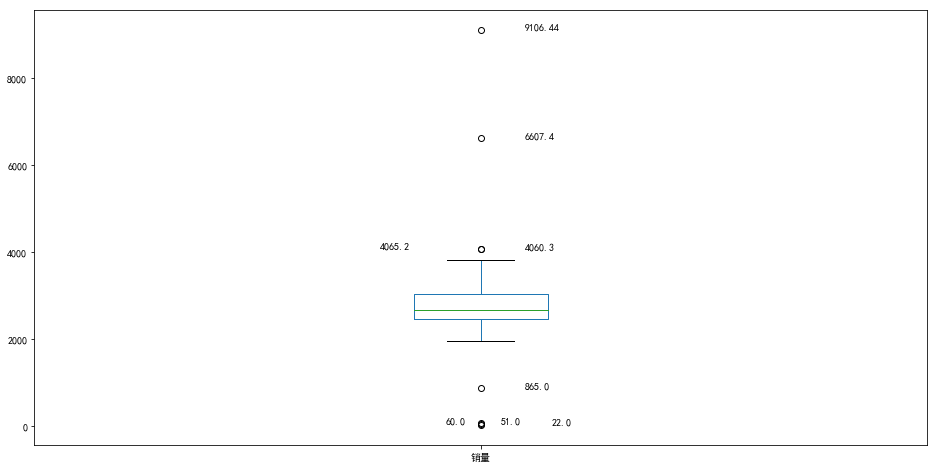

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']  #用来显示正常的中文
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
p = data.plot(kind='box',figsize=(16,8),return_type='dict')
x = p['fliers'][0].get_xdata()
y = p['fliers'][0].get_ydata()
y.sort()
for i in range(len(x)):
    if i > 0:
        plt.annotate(y[i],xy=(x[i],y[i]),xytext=(x[i]+0.05-0.8/(y[i]-y[i-1]),y[i]))
    else:
        plt.annotate(y[i],xy=(x[i],y[i]),xytext=(x[i]+0.08,y[i]))

In [4]:
data.head()

,销量
日期,
2015-03-01,51.0
2015-02-28,2618.2
2015-02-27,2608.4
2015-02-26,2651.9
2015-02-25,3442.1


In [5]:
data['销量'].head()

日期
2015-03-01      51.0
2015-02-28    2618.2
2015-02-27    2608.4
2015-02-26    2651.9
2015-02-25    3442.1
Name: 销量, dtype: float64

Text(2014-11-11 00:00:00,4158.5,'2158.5')

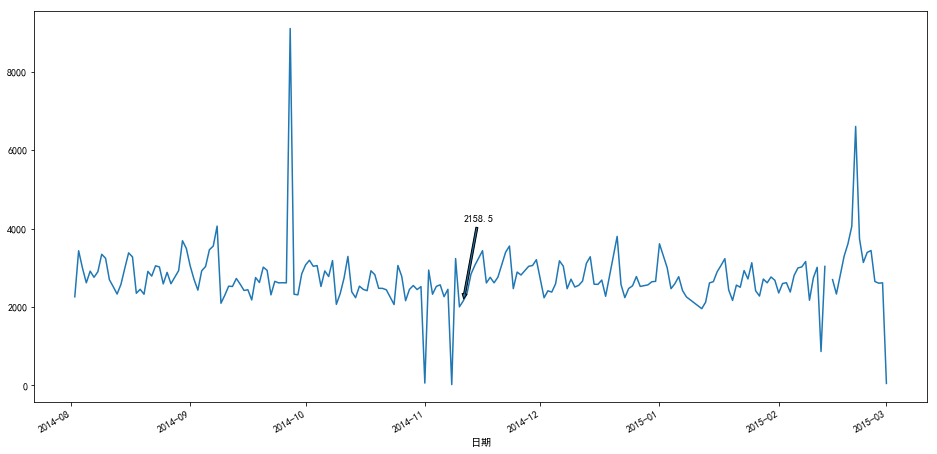

In [2]:
from datetime import datetime
pt = data['销量']
pt.plot(figsize=(16,8))


x = datetime(2014,11,11)
y = 2158.5
plt.annotate(y,xy=(x,y),xytext=(x,y+2000),arrowprops=dict(arrowstyle='simple'))

In [38]:
fish_data = pd.read_excel('./原书代码数据/chapter3/demo/data/catering_fish_congee.xls',names=["日期","销售额"])

In [39]:
fish_data.describe()

,销售额
count,90.000000
mean,1241.333333
std,941.317843
min,45.000000
25%,420.000000
50%,900.000000
75%,1792.500000
max,3960.000000


In [40]:
fish_data.head()

,日期,销售额
0,2014-04-02,900
1,2014-04-03,1290
2,2014-04-04,420
3,2014-04-05,1710
4,2014-04-06,1290


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000156D09E8>]],
      dtype=object)

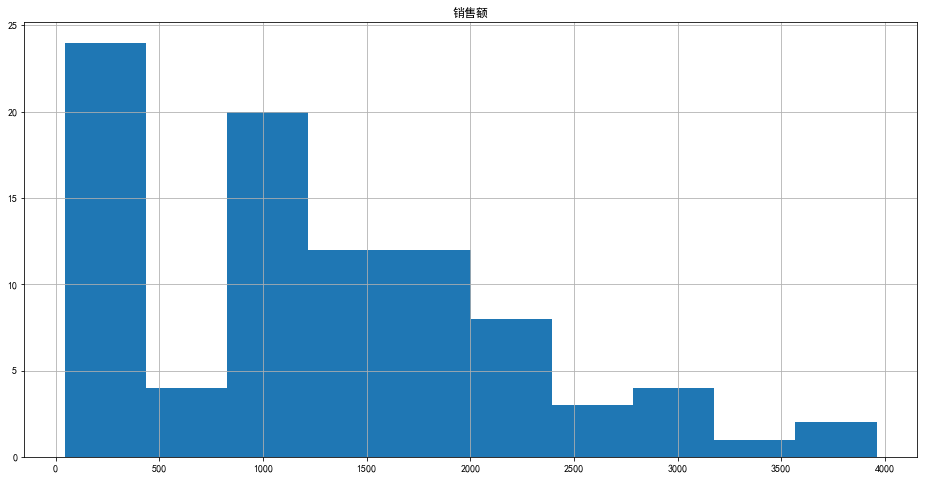

In [66]:
fish_data.hist(column='销售额',bins=10,figsize=(16,8))

In [67]:
data = pd.read_excel('./原书代码数据/chapter3/demo/data/catering_sale.xls',index_col='日期')

In [69]:
data.head()

,销量
日期,
2015-03-01,51.0
2015-02-28,2618.2
2015-02-27,2608.4
2015-02-26,2651.9
2015-02-25,3442.1


In [70]:
data.describe()

,销量
count,200.000000
mean,2755.214700
std,751.029772
min,22.000000
25%,2451.975000
50%,2655.850000
75%,3026.125000
max,9106.440000


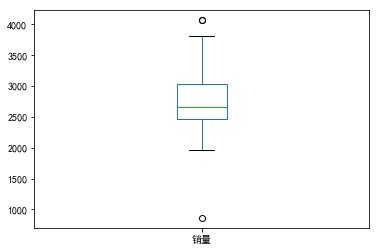

In [74]:
data.plot(kind='box')

In [72]:
data = data[(data.销量 > 400) & (data.销量 < 5000)]

In [75]:
statistics = data.describe()

In [76]:
statistics

,销量
count,195.000000
mean,2744.595385
std,424.739407
min,865.000000
25%,2460.600000
50%,2655.900000
75%,3023.200000
max,4065.200000


In [79]:
statistics.loc['range'] = statistics.loc['max']-statistics.loc['min']
statistics.loc['var'] = statistics.loc['std']/statistics.loc['mean']
statistics.loc['dis'] = statistics.loc['75%']-statistics.loc['25%']

In [80]:
statistics

,销量
count,195.000000
mean,2744.595385
std,424.739407
min,865.000000
25%,2460.600000
50%,2655.900000
75%,3023.200000
max,4065.200000
range,3200.200000
var,0.154755
